In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
import seaborn as sns

font_dirs = [
    "../.local/share/fonts/otf/TexGyreHeros/"
]  # The path to the custom font file.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.rcParams["font.family"] = ["TeX Gyre Heros", "sans-serif"]

In [2]:
mitchell = pd.read_csv("Summary_cut.csv")
mitchell.drop(index=mitchell[mitchell.age == 75].index, inplace=True)
mitchell["cell_type"] = mitchell["cell_type"].str.replace("Progenitor", "HPC")
for c in ["donor_id", "cell_type", "sample_type"]:
    mitchell[c] = mitchell[c].astype("category")
mitchell.dtypes

donor_id            category
age                    int64
colony_ID             object
original_ID           object
cell_type           category
sample_type         category
timepoint              int64
PDID                  object
number_mutations       int64
mean_depth           float64
sub_adj              float64
number_indels          int64
indel_adj            float64
number_non_syn         int64
platform              object
tel_length           float64
dtype: object

/tmp/ipykernel_15305/2189155381.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(


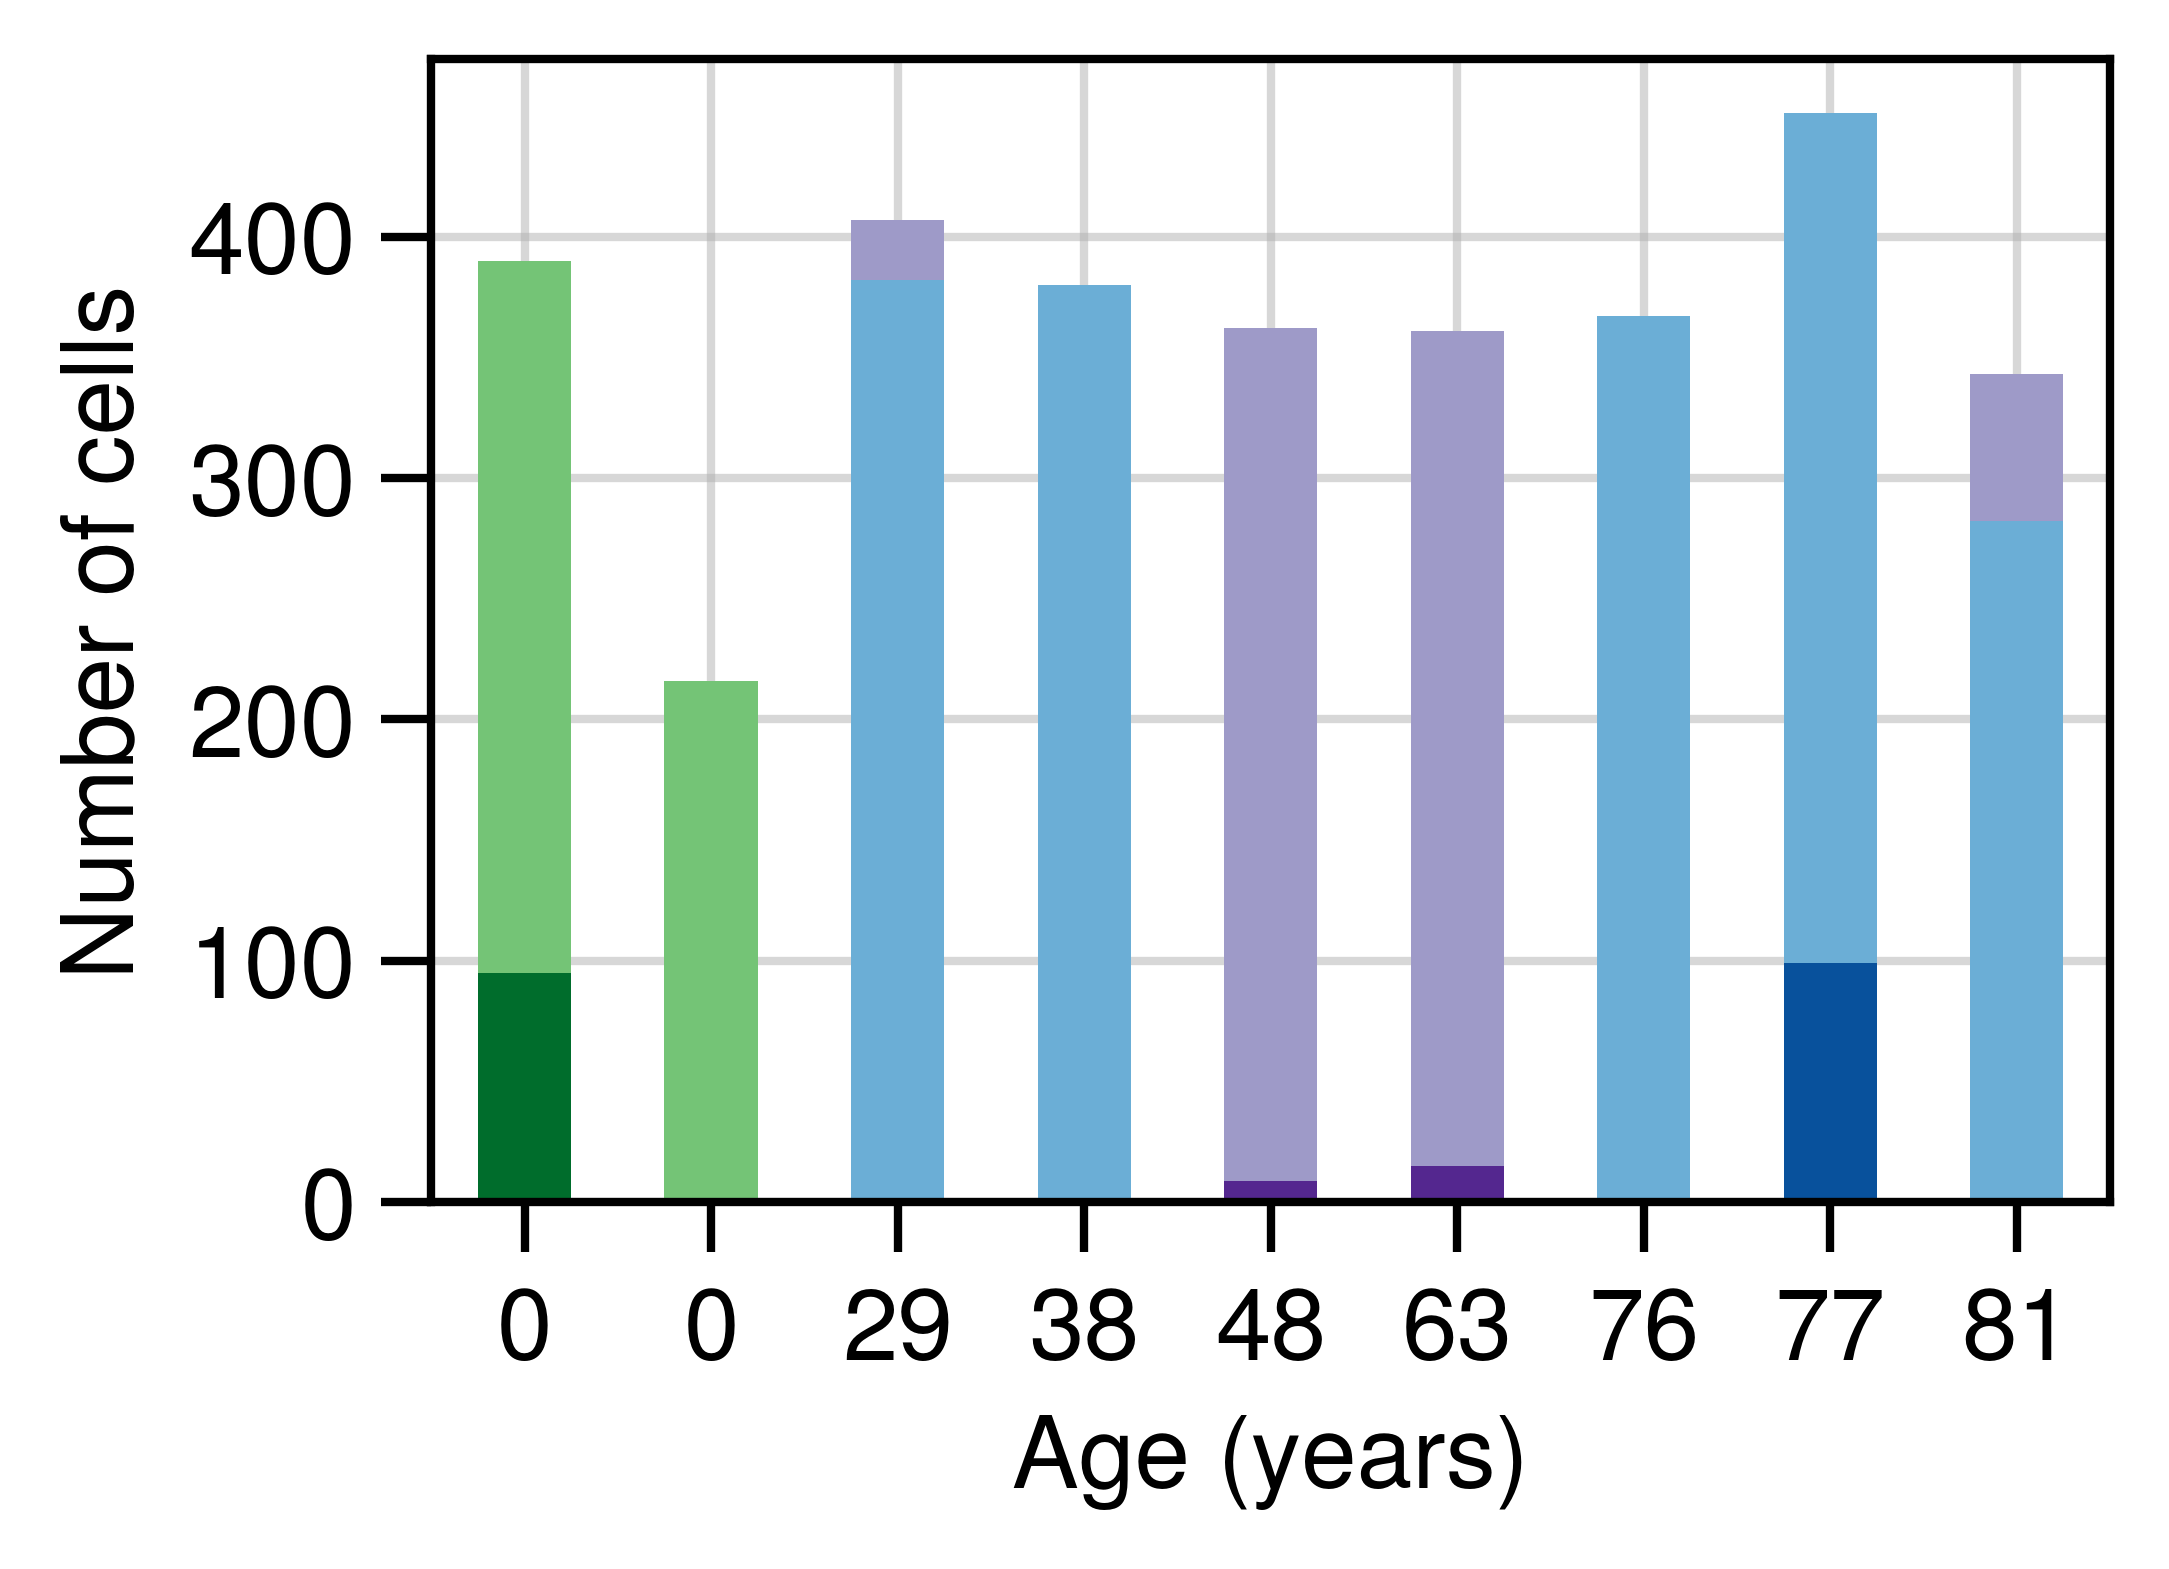

In [3]:
df = (
    mitchell[["colony_ID", "donor_id", "cell_type", "sample_type"]]
    .groupby(["donor_id", "cell_type", "sample_type"], observed=True)
    .count()
    .reset_index()
)
# Create a single "group" column that combines cell_type and sample_type for clarity in the legend
df["group"] = df["sample_type"].astype(str) + " (" + df["cell_type"].astype(str) + ")"
pivot_df = df.pivot_table(
    index="donor_id", columns="group", values="colony_ID", aggfunc="sum", fill_value=0
)
pivot_df = pivot_df.reindex(mitchell.sort_values(by="age").donor_id.unique())
fig, ax = plt.subplots(1, 1, layout="constrained")
ax = pivot_df.plot(
    ax=ax,
    kind="bar",
    stacked=True,
    color=["#08519c", "#6baed6", "#006d2c", "#74c476", "#54278f", "#9e9ac8"],
)
ax.set_ylabel("Number of cells")
# ax.legend(title="", fontsize=10, ncols=3)
ax.legend().remove()
ax.set_xlabel("Age (years)")
ax.set_xticks(
    ticks=range(0, 9),
    labels=[0] + mitchell.sort_values(by="age").age.unique().tolist(),
    rotation=0,
)
plt.savefig("mitchell_celltypes.svg")
plt.show()

In [4]:
pd.read_csv("/mnt/c/Users/fra_t/Documents/PhD/hsc/mitchell2022/mutMatrixAX001.csv")

,Unnamed: 0,BMH1_TG001_3_P11_A07,BMH1_TG001_3_P11_E01,BMH1_TG001_3_P11_C07,BMH1_TG001_3_P11_D07,BMH1_TG001_3_P11_E07,BMH1_TG001_3_P11_F07,BMH1_TG001_3_P11_G07,BMH1_TG001_3_P11_H07,BMH1_TG001_3_P11_A08,...,BMH1_TG001_3_P12_G09,BMH1_TG001_3_P12_G03,BMH1_TG001_3_P11_D02,BMH1_TG001_3_P12_A04,BMH1_TG001_3_P12_B04,BMH1_TG001_3_P12_C04,BMH1_TG001_3_P12_E04,BMH1_TG001_3_P12_F04,BMH1_TG001_3_P12_G04,BMH1_TG001_3_P12_H04
0,1-100007740-C-T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1-100008341-G-A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1-100010259-T-C,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
3,1-100031445-A-C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1-100037973-C-T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319548,Y-3147743-C-CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0
319549,Y-3540013-GTAGA-G,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0
319550,Y-5254304-GT-G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,0.5,0.0,0.5,0.0,0.0,0.5
319551,Y-5322982-CT-C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0
